In [92]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

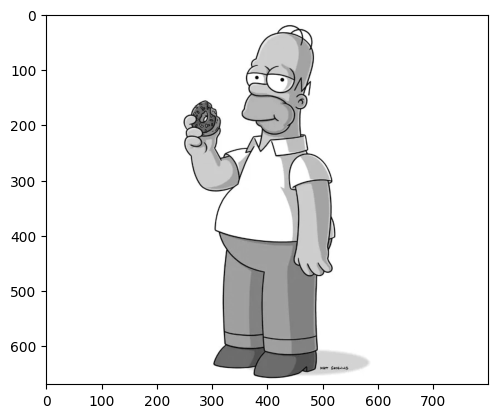

In [93]:
img_homer = cv2.imread('images/homer-simpson.jpg')
img_cuadro = cv2.imread('images/test_im_1.png')
img_homer = cv2.cvtColor(img_homer, cv2.COLOR_BGR2GRAY)
img_cuadro = cv2.cvtColor(img_cuadro, cv2.COLOR_BGR2GRAY)
plt.imshow(img_homer, cmap='gray')

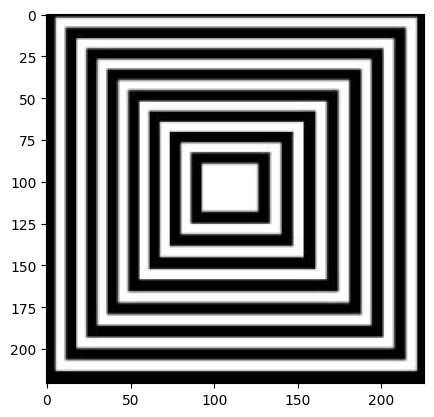

In [94]:
plt.imshow(img_cuadro, cmap='gray')

In [95]:
def moravec_chido(image, treshold = 1000, k_size = 3):
    image = np.int32(image)
    corners = np.zeros_like(image, dtype=np.int32)
    xy_shifts = [(1, 0), (1, 1), (0, 1), (-1, 1)]
    for x in range(k_size//2 + 1, image.shape[0]-k_size//2 -1):
        for y in range(k_size//2 + 1, image.shape[1]-k_size//2 - 1):
            diff = treshold
            for shift in xy_shifts:
                diff2 = image[x + shift[0], y + shift[1]] - image[x, y]
                diff2 = diff2 * diff2
                diff2 = np.min(diff2)
                if diff2 < diff:
                    diff = diff2
            corners[x, y] = diff
    return corners

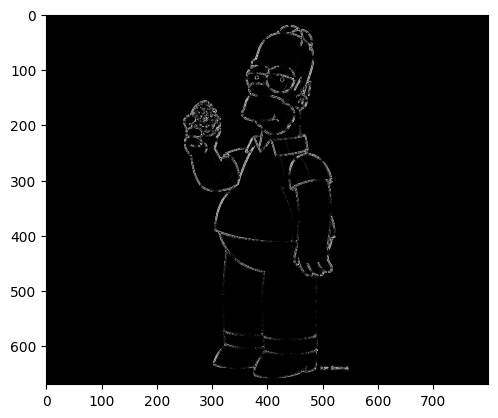

In [96]:
mora = moravec_chido(img_homer)
plt.imshow(mora, cmap='gray')
plt.show()

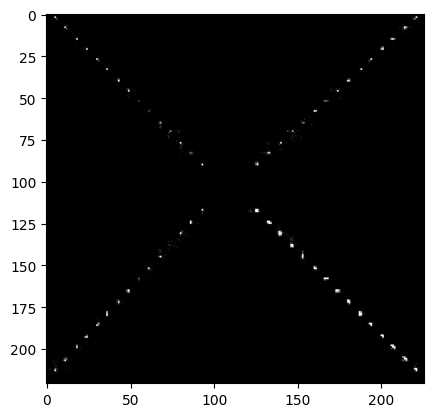

In [97]:
mora = moravec_chido(img_cuadro)
plt.imshow(mora, cmap='gray')
plt.show()

Entre las principales fortalezas de este algoritmo, esta que su deteccion de bordes es muy precisa, lo cual es muy util en figuras con muchos cuadrados o rectangulos. Tambien demostro ser util como detector de figuras, pues en imageens mas complejas se muestra un contorno claro sobre patrones o componentes dentro de la imagen.

Sin embargo, el principal limitante de este algoritmo se da en el treshold que usa para detectar, asi como en el kernel, pues tenemos que ajustar estos hiperparametros de forma que se ajusten a nuestro modelo. Al hacer preubas con otros valores podemos llegar a mejores o peores resultados, y por ello estos son valores que debemos saber ajustar si queremos obtener un buen comportamiento de nuestro algoritmo.